In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [128]:
#importing csv file
df = pd.read_csv('churn_clean.csv')

In [129]:
#Getting Dummy Variables
df = pd.get_dummies(df, drop_first = True)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 38437 entries, CaseOrder to PaymentMethod_Mailed Check
dtypes: float64(7), int64(16), uint8(38414)
memory usage: 368.1 MB


In [131]:
df1 = df[['Age','Children','Income','Outage_sec_perweek','Phone_Yes', 'MonthlyCharge', 'Churn_Yes']]

In [132]:
df1

,Age,Children,Income,Outage_sec_perweek,Phone_Yes,MonthlyCharge,Churn_Yes
0,68,0,28561.99,7.978323,1,172.455519,0
1,27,1,21704.77,11.699080,1,242.632554,1
2,50,4,9609.57,10.752800,1,159.947583,0
3,48,1,18925.23,14.913540,1,119.956840,0
4,83,0,40074.19,8.147417,0,149.948316,1
...,...,...,...,...,...,...,...
9995,23,3,55723.74,9.415935,1,159.979400,0
9996,48,4,34129.34,6.740547,1,207.481100,0
9997,48,1,45983.43,6.590911,1,169.974100,0
9998,39,1,16667.58,12.071910,0,252.624000,0


In [133]:
#prihting our cleaned data to csv
df1.to_csv ('cleaned_data_task2.csv')

In [134]:
df1.columns

Index(['Age', 'Children', 'Income', 'Outage_sec_perweek', 'Phone_Yes',
       'MonthlyCharge', 'Churn_Yes'],
      dtype='object')

In [135]:
df1.describe()

,Age,Children,Income,Outage_sec_perweek,Phone_Yes,MonthlyCharge,Churn_Yes
count,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.078400,2.0877,39806.926771,10.001848,0.906700,172.624816,0.265000
std,20.698882,2.1472,28199.916702,2.976019,0.290867,42.943094,0.441355
min,18.000000,0.0000,348.670000,0.099747,0.000000,79.978860,0.000000
25%,35.000000,0.0000,19224.717500,8.018214,1.000000,139.979239,0.000000
50%,53.000000,1.0000,33170.605000,10.018560,1.000000,167.484700,0.000000
75%,71.000000,3.0000,53246.170000,11.969485,1.000000,200.734725,1.000000
max,89.000000,10.0000,258900.700000,21.207230,1.000000,290.160419,1.000000


In [136]:
pd.value_counts(df['Churn_Yes'])

0    7350
1    2650
Name: Churn_Yes, dtype: int64

In [137]:
pd.value_counts(df['Phone_Yes'])

1    9067
0     933
Name: Phone_Yes, dtype: int64

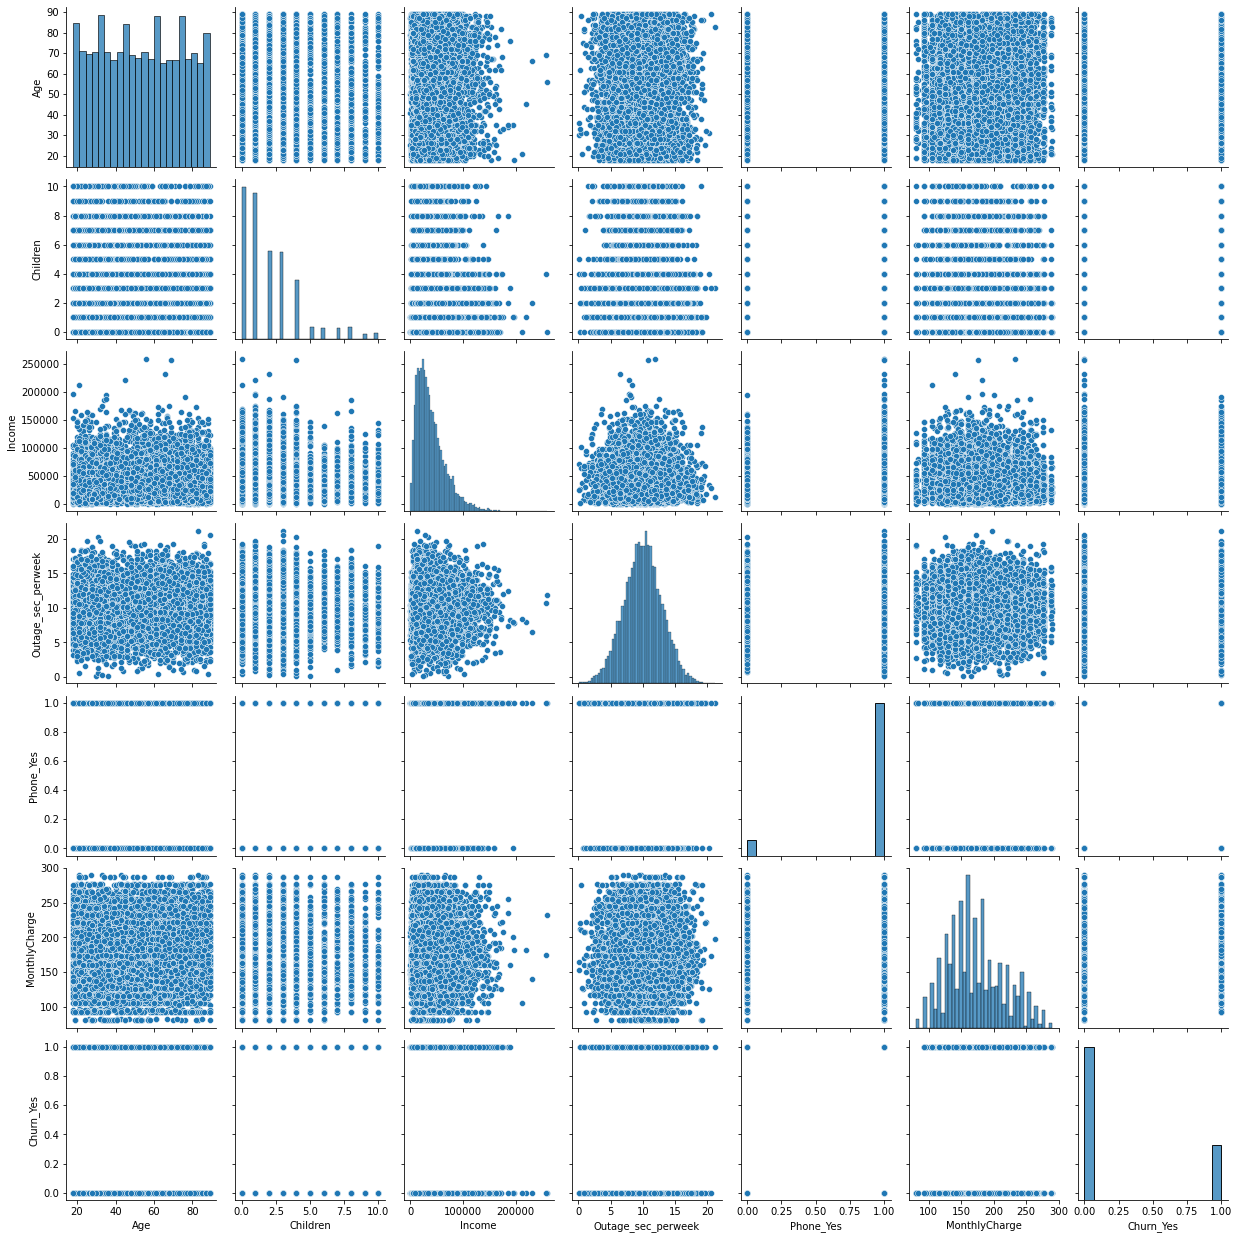

In [42]:
#plotting using pairplot
sns.pairplot(df1)

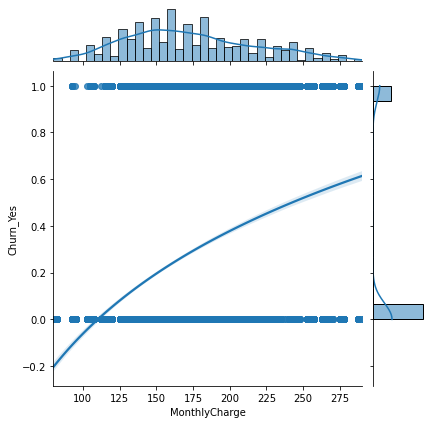

In [140]:
#correlation without reg line

sns.jointplot(data = df1, x = df1['MonthlyCharge'], y = df1['Churn_Yes'], kind="reg",
              logx=True,)

In [59]:
from sklearn.model_selection import train_test_split

In [64]:
X = df1[['Age','Children','Income','Outage_sec_perweek','Phone_Yes','MonthlyCharge']]
y = df1['Churn_Yes']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [68]:
predictions = logmodel.predict(X_test)

In [76]:
from sklearn.metrics import classification_report, confusion_matrix

In [77]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))


              precision    recall  f1-score   support

           0       0.73      0.95      0.83      2388
           1       0.43      0.09      0.15       912

    accuracy                           0.71      3300
   macro avg       0.58      0.52      0.49      3300
weighted avg       0.65      0.71      0.64      3300

[[2272  116]
 [ 826   86]]


In [72]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [73]:
Xc = sm.add_constant(X)
logistic_regression = sm.Logit(y,Xc)
fitted_model = logistic_regression.fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 6


C:\Users\macks\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\macks\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1852: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [74]:
fitted_model.summary()

C:\Users\macks\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\macks\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Churn_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9993
Method:                           MLE   Df Model:                            6
Date:                Tue, 01 Jun 2021   Pseudo R-squ.:                     inf
Time:                        12:36:21   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.6269      0.177    -26.210      0.000      -4.973      -4.281
Age                    0.0003      0.001      0.246      0.806      -0.002       0.003
Children              -0.0024      0.012     -0.205      0.838      -0.025       0.020
Income              6.494e-07   8.65e-07      0.751      0.453   -1.05e-06    2.34e-06
Outage_sec_perweek    -0.0069      0.008     -0.839      0.402      -0.023       0.009
Phone_Yes             -0.1666      0.082     -2.037      0.042      -0.327      -0.006
MonthlyCharge          0.0210      0.001     34.726      0.000       0.020       0.022
======================================================================================
"""

In [119]:
X = df1[['Phone_Yes','MonthlyCharge']]
y = df1['Churn_Yes']

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [121]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [122]:
predictions = logmodel.predict(X_test)

In [123]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84      2388
           1       0.57      0.27      0.37       912

    accuracy                           0.74      3300
   macro avg       0.67      0.60      0.60      3300
weighted avg       0.71      0.74      0.71      3300

[[2203  185]
 [ 665  247]]


In [124]:
Xc = sm.add_constant(X)
logistic_regression = sm.Logit(y,Xc)
fitted_model = logistic_regression.fit()
fitted_model.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 6


C:\Users\macks\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\macks\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1852: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\macks\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\macks\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Churn_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Wed, 02 Jun 2021   Pseudo R-squ.:                     inf
Time:                        12:09:12   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -4.6581      0.137    -33.970      0.000      -4.927      -4.389
Phone_Yes        -0.1656      0.082     -2.025      0.043      -0.326      -0.005
MonthlyCharge     0.0210      0.001     34.720      0.000       0.020       0.022
=================================================================================
"""